<div class="w3-bar w3-blue-grey w3-padding">
    <h2 class="w3-bar-item w3-padding-32"><!-- Text Here --></h2>
    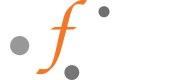
</div>

<div class="w3-panel w3-leftbar w3-border-green w3-pale-green w3-padding-small">
    <h3 id="-Overview%3A-Plotting-with-Python-in-the-%5BWL%5D-labs%0A"><i class="fa fa-file-o"></i> Overview: Plotting with Python in the [WL] labs
</h3>
    <p>Welcome to Sloan's python notebook to produce a reasonably nice graph for the [WL] labs. We will read in data, plot it, fit a linear function and then output the graph as a graphics file, here a png file.</p>
</div>

<div class="w3-panel w3-leftbar w3-border-blue w3-pale-blue w3-padding-small">
    <h3 id="--Jupyter-Notebooks%0A"><i class="fa fa-info-circle"></i> Jupyter Notebooks
</h3>
    <p>You can use jupyter notebooks like a lab book. It's important to write down what you're doing in your experiment and analysis; when you come back to a notebook at a later date with no recollection of what you did before, you'll thank your past self for making such clear notes.
To "run" a cell, either press the <code>Run</code> button at the top, or press <code>Shift-Enter</code>.</p>
</div>

## A brief note about markdown
Jupyter notebooks (i.e. the file you're working with now) allow for different types of 'cells'. Markdown cells (like this one) are great for documenting what you're doing. If you've ever posted on an internet forum, you've probably already used markdown, although you may not have realised it! 

You can make headings of different sizes using \# at the start of a line.
# big (\#)
## medium (\##)
### small (\###)

You can make text *italic* using one \* at each end of the text. **Bold** uses two \*\*.

Making lists is easy too!

* bulleted lists 
* are made by putting
* \* (asterix) at the start of a line
- or maybe 
- a dash (\-)
- you don't even need to be consistent.


1. Numbered lists
2. Just by numbering things
3. i.e. 1., 2., at the start of a line
7. and it doesn't matter
4. if your numbers are in the right order

(The list above was numbered 1, 2, 3, 7, 4)

A nice markdown cheatsheet can be found [here](https://en.support.wordpress.com/markdown-quick-reference/, "markdown cheatsheet") 

You can look at the raw text that made this cell by double-clicking the cell.

# Plotting and fitting

Now we've been introduced to jupyter notebooks, we'll get onto some python. 

As well as markdown, jupyter notebook cells can also contain code.

It's very helpful to split your code up into cells rather than put it all in one big one. This way, if something doesn't work, it's easy(ier) to locate the problem.

<div class="w3-panel w3-leftbar w3-border-green w3-pale-green w3-padding-small">
    <h3 id="-Setup%3A-Importing-python-packages%0A"><i class="fa fa-gears"></i> Setup: Importing python packages
</h3>
    <p>Python routines exist in packages. The first thing to do is to load the packages you need for your analysis using</p>
<div class="highlight"><pre><span></span><span class="kn">import</span> <span class="nn">modulename</span>
</pre></div>
<p>In the next cell we import the packages needed to plot a graph and fit a line to our data. 
You'll notice that some packages are loaded slightly differently, e.g.</p>
<div class="highlight"><pre><span></span><span class="kn">import</span> <span class="nn">matplotlib.pyplot</span> <span class="kn">as</span> <span class="nn">plt</span>
</pre></div>
<p>Here we're loading the <code>pyplot</code> sub-package of <code>matplotlib</code>. So we don't need to type <code>matplotlib.pyplot</code> every time we want to use it, we load it as <code>plt</code>.</p>
</div>

In [1]:
## Some code that imports all the various sub-routines that we will need. Leave alone.

import matplotlib.pyplot as plt ### plotting things
import numpy as np ## one of python's main maths packages
import pandas as pd ## for reading in our data
from scipy.optimize import curve_fit ## for fitting a line to our data

import matplotlib.ticker as ticker ## this one lets us change some parameters in our plots.
### makes our plots show up 'inline'
%matplotlib inline 
## high resolution plots for retina displays

%config InlineBackend.figure_format = 'retina' 

The last two lines of the cell above, starting with `%` are called **magic commands**. You don't need many of them, but the `inline` and `retina` ones are pretty handy. A guide to magic commands can be found [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html, "magic commands")

# Reading in our data with pandas

Unfortunately, this does not mean finding a panda to read our excel files.

Pandas is the **Python Data Analysis Library**. It can read pretty much anything you throw at it. If you've been putting your lab data into an excel spreadsheet, pandas can read it in so you can analyse and plot it. You can find out more about what you can do with pandas [here](https://pandas.pydata.org/,"pandas").

Our first step is to read in our excel spreadsheet to a pandas **dataframe**. Pandas has different functions for different file types. For excel, we need `pd.read_excel`. Our dataframe will be called `data`, but it's best to use a more descriptive name for your variables.

In [2]:
### read in ALL the excel file and save its data to variable "data"

data = pd.read_excel('../data/BoltData.xlsx')

It's easy to look at what's in our dataframe. Just type the name of it and your dataframe is printed to the screen.

In [3]:
## have a look at the data and print it to the screen.
data

,distance/m,Distnace uncertinty / m,time/s,Time measurment uncertinty / s
0,0,0.02,0.000000,1.004810
1,10,0.02,0.923422,0.637569
2,20,0.02,2.178145,0.382366
3,30,0.02,2.461897,0.911785
4,40,0.02,3.387051,0.198510
5,50,0.02,5.263879,1.152222
6,60,0.02,6.042705,0.161827
7,70,0.02,7.939192,0.732011
8,80,0.02,8.221779,1.267329
9,90,0.02,8.578128,0.590908


## Tidying up our data

Right now our `data` dataframe looks a bit of a mess. There's loads of missing or `NaN` (not a number) values, and our columns don't have very sensible names. We can re-read the data, specifying what we want to keep and give better names for our columns.

In [4]:
## Now we can read in only what items we want and give each column a better name.
data = pd.read_excel('../data/BoltData.xlsx', 
                        names=('distance', 'err_distance', 'time', 'err_time'), 
                        usecols=(0,1,2,3), 
                        skipfooter=12)

In [5]:
## have a look at the dataframe just to make sure we have what we wanted.
data

,distance,err_distance,time,err_time
0,0,0.02,0.000000,1.004810
1,10,0.02,0.923422,0.637569
2,20,0.02,2.178145,0.382366
3,30,0.02,2.461897,0.911785
4,40,0.02,3.387051,0.198510
5,50,0.02,5.263879,1.152222
6,60,0.02,6.042705,0.161827
7,70,0.02,7.939192,0.732011
8,80,0.02,8.221779,1.267329
9,90,0.02,8.578128,0.590908


<div class="w3-panel w3-leftbar w3-border-blue w3-pale-blue w3-padding-small">
    <h3 id="--nrows-vs-skipfooter%0A"><i class="fa fa-info-circle"></i> nrows vs skipfooter
</h3>
    <p>In the <code>pd.read_excel</code> command above, I've used the argument <code>nrows=11</code>. This reads the 10 rows of data and the header row. If you're using a version of <code>pandas</code> older than 0.23.0 you can't use the <code>nrows</code> parameter, and should use <code>skipfooter</code> insted:</p>
<div class="highlight"><pre><span></span><span class="n">data</span> <span class="o">=</span> <span class="n">pd</span><span class="o">.</span><span class="n">read_excel</span><span class="p">(</span><span class="s1">&#39;BoltData.xlsx&#39;</span><span class="p">,</span> 
                        <span class="n">names</span><span class="o">=</span><span class="p">(</span><span class="s1">&#39;distance&#39;</span><span class="p">,</span> <span class="s1">&#39;err_distance&#39;</span><span class="p">,</span> <span class="s1">&#39;time&#39;</span><span class="p">,</span> <span class="s1">&#39;err_time&#39;</span><span class="p">),</span> 
                        <span class="n">usecols</span><span class="o">=</span><span class="p">(</span><span class="mi">0</span><span class="p">,</span><span class="mi">1</span><span class="p">,</span><span class="mi">2</span><span class="p">,</span><span class="mi">3</span><span class="p">),</span> 
                        <span class="n">skipfooter</span><span class="o">=</span><span class="mi">12</span><span class="p">)</span>
</pre></div>
<p>This ignores the last 12 rows of the file. 
You can find out which version of <code>pandas</code> (or any package) you have by running</p>
<div class="highlight"><pre><span></span><span class="n">pd</span><span class="o">.</span><span class="n">__version__</span>
</pre></div>
<p>where <code>version</code> has 2 underscores on either side.</p>
</div>

# Plotting, plotting, plotting....

Now we have our data in a useful format we can start to look at it. 

To make a quick plot we use the `matplotlib.pyplot` package, that we loaded as `plt`.

First make a plot with all the default settings to take a quick look at our data. You should always take a quick look at your data to make sure there aren't any suprises like weird points or typos.

To plot the data from our dataframe, we call the columns we want to plot using 
```python
plt.plot(dataframe.xcolumn, dataframe.ycolumn)
```
where `xcolumn` and `ycolumn` are the names of the columns we want to see.

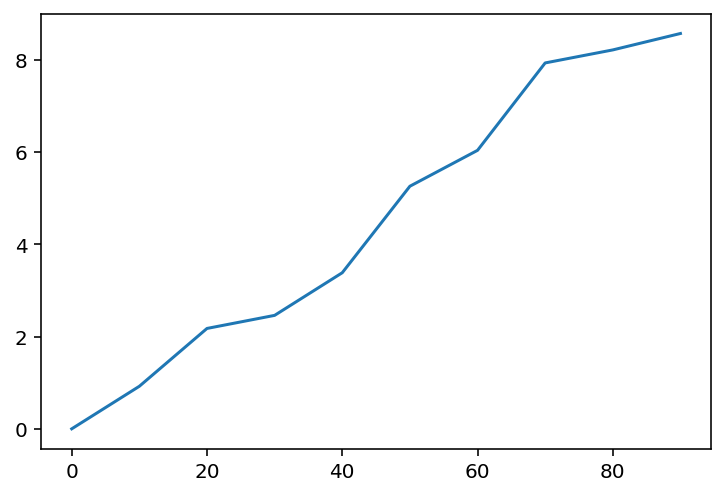

In [6]:
# our first plot quick and easy just to see what the data looks like. plot(xcolumn, and ycolumn).
plt.plot( data.distance , data.time )

We can see from this quick plot that our data looks fine, but it's not particularly informative right now. We don't have axis labels, or errorbars, for example. We can now play around with different things in `plt` to add what we want to our plot.

## Making a pretty plot

There are lots of parameters you can play around with in `plt`. We won't look at them all here, but will make a nice looking, informative plot that you can use as a template for your lab experiments.

### Changing the size

It's handy to set up a `figure` object when you're making nice plots (as opposed to the quick-look one we made before). This will let you include subfigures, and change parameters that affect the whole figure. We can also set up the size and the aspect ratio here:
```python
fig = plt.figure(figsize=(10,6))
```
where the values passed to `figsize` are the width and height in inches. You don't need to worry too much about the absolute values, but you should make it big enough that it's easy to read and the aspect ratio makes sense.

### subplot

Even if you only have one figure, you can use the `subplot` command. This lets you set the parameters in your plot (rather than the whole figure) by referring to the name of the subplot:
```python
ax = fig.add_subplot(nrows,ncols,index)
```
Here `nrows` is the number of rows of plots you want, ncols is the number of columns, and index tells it where to put the subplot, starting at 1 in the upper left corner and increasing to the right.
So
```python
ax = fig.add_subplot(1,1,1)
```
will split your figure into 1 row, 1 column, and make the plot in the 1st position.
```python
ax = fig.add_subplot(2,3,4)
```
would split the figure into 2 rows and 3 columns, and make your plot in the lower left plot.

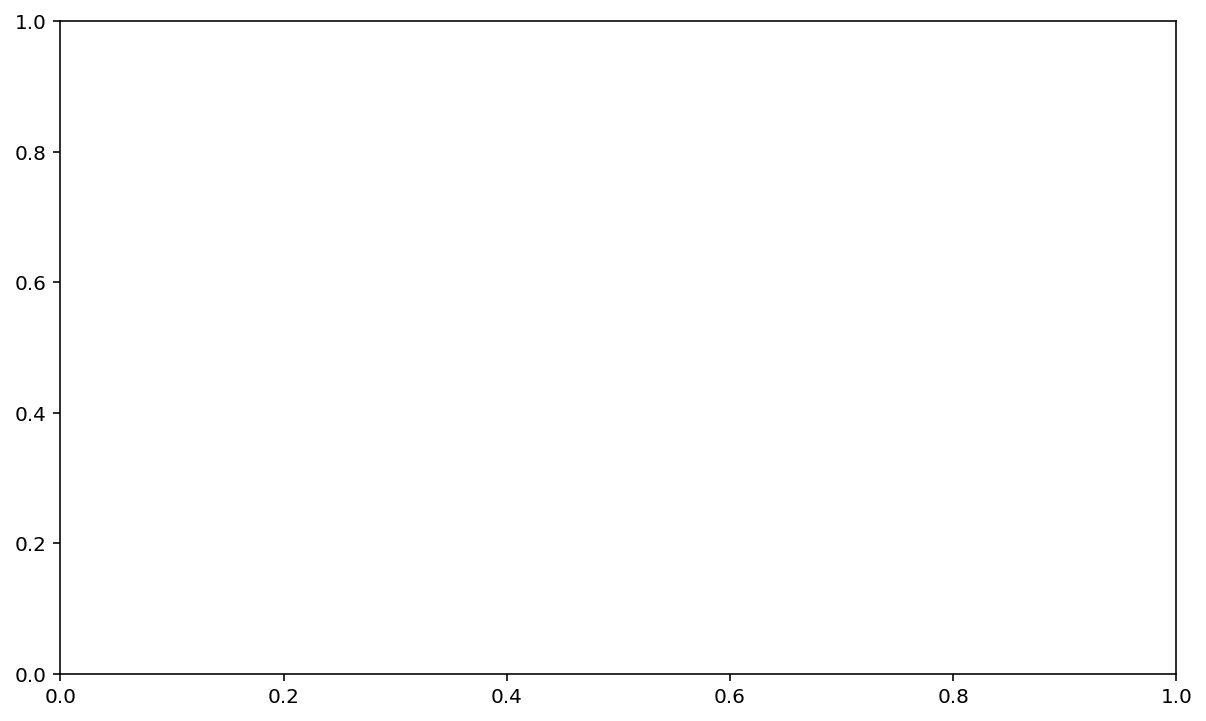

In [7]:
# Create a "figure" and set its aspect ratio. Play with the numbers to make it square, or long or short. 
fig = plt.figure(figsize=(10,6))

# Here we only want one plot in the figure to a 1 by 1 set of plots and this is number 1. Leave alone for now. 
ax = fig.add_subplot(1,1,1)

We now have an empty plot ready for data!

## Plotting the data

Any plot you make should be clear and informative. There are several things that you **always** need on a plot of your results:
* Error bars
* Axis labels
* Units

We can do this pretty easily with `plt`. First we call `errorbar` to plot our points and errorbars.

This time, instead of calling `plt.errorbar`, we use `ax.errorbar`. This tells `plt` to add the points to the plot we already set up. 
```python
ax.errorbar(data.distance,           
             data.time,              
             xerr=data.err_distance, 
             yerr=data.err_time,     
             marker='o',             
             markersize = 7,        
             color='black',          
             ecolor='black',         
             markerfacecolor='black',
             linestyle='none',       
             capsize=6,              
             )
```
Here were're calling `errorbar`, telling it which columns correspond to the `x` and `y` uncertainties and the size and shape, and colour of our points. `linestyle='none'` is telling it **not** to draw a line joining up all our points. `capsize` sets the size the end bars on the errorbars.
This command looks pretty long, but we'll look later at how to set some parameters as defaults.


Finally, we add the axis labels **including the units** using `ax.set_xlabel` and `ax.set_ylabel` so our plot actually means something. 

<div class="w3-panel w3-leftbar w3-border-blue w3-pale-blue w3-padding-small">
    <h3 id="-A-word-of-warning-about-axis-labels%0A"><i class="fa fa-info-circle"></i> A word of warning about axis labels
</h3>
    <p>If you're setting the axis labels for a <code>subplot</code> like we are here you should use <code>ax.set_xlabel</code>. If you haven't set up subplots (for example, if you're just making a quick-look figure, you should use <code>plt.xlabel</code> instead. You'll know if you've used the wrong command if you get an error that looks like</p>
<div class="highlight"><pre><span></span><span class="ne">AttributeError</span><span class="p">:</span> <span class="s1">&#39;AxesSubplot&#39;</span> <span class="nb">object</span> <span class="n">has</span> <span class="n">no</span> <span class="n">attribute</span> <span class="s1">&#39;xlabel&#39;</span>
</pre></div>
</div>

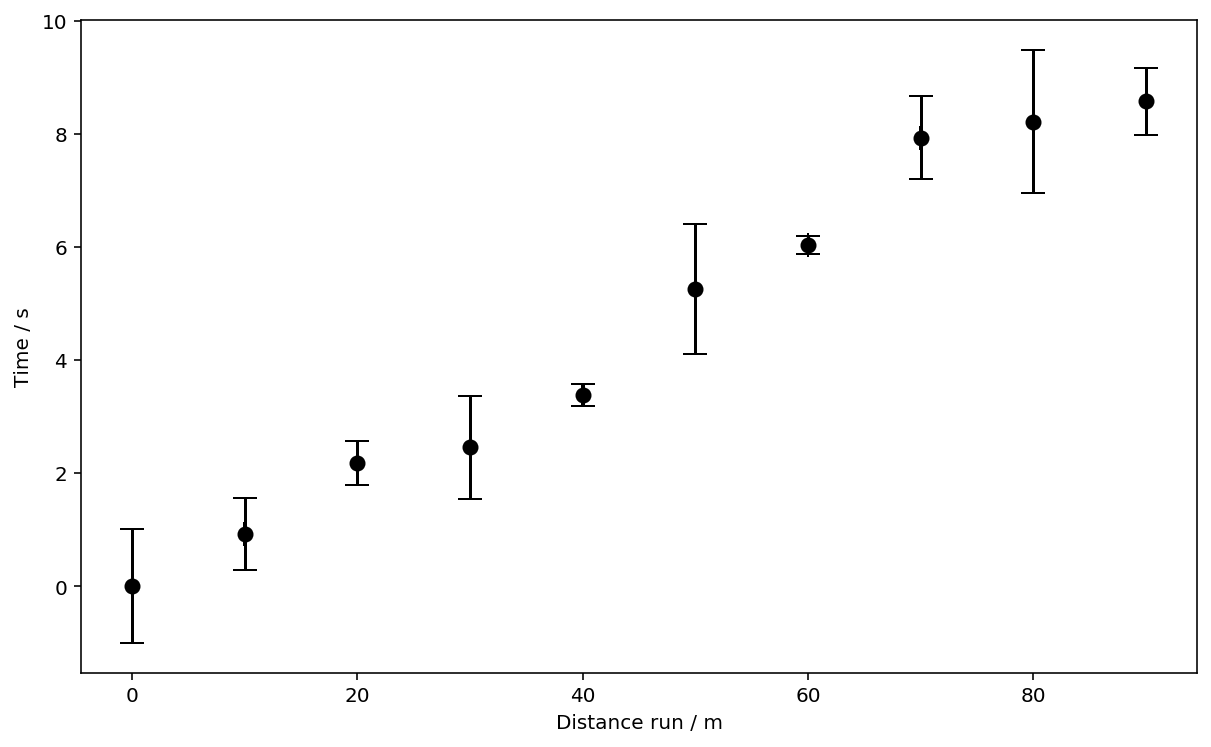

In [8]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(data.distance,           # x coordinates
             data.time,              # y coordinates
             xerr=data.err_distance, # x errors
             yerr=data.err_time,     # y errors
             marker='o',             # marker used is a cicle 'o'. Could be crosses 'x', or squares 's', or 'none'
             markersize = 7,        # marker size
             color='black',          # overall colour I think
             ecolor='black',         # edge colour for you marker
             markerfacecolor='black',
             linestyle='none',       # no line joining markers, could be a line '-', or a dashed line '--'
             capsize=6,              # width of the end bit of the error bars, not too small nor too big please.
             )
#ax.set_xlabel('Distance run / m')  
ax.set_xlabel('Distance run / m')# You can use Latex here is you wish, e.g., 'Distance run / 10$^{-3}$ km'
ax.set_ylabel('Time / s')

plt.show()

## Making it fancy

Now our plot is starting to look good! We can now add in some finishing touches

### tick marks

We can change the tick marks on the axes to go into the graph rather than out towards the numbers. This makes the plot easier to read. 

### font size

The font size should be big enough that it's easy to read when it's printed or included in your lab report.

To change the font size we use `plt.rcParams.update`. This changes the settings for all the text.

In [9]:
ax.tick_params(direction='in',      # I like 'in', could be 'out' or both 'inout'
                length=7,            # A reasonable length
                bottom='on',         # I want ticks on the bottom axes
                left='on',
                top='on',
                right='on',
                
               )
plt.rcParams.update({'font.size':15})   # A decent font size so the text is readible. 
                                        # You may have to play with the aspect ration aobe and this to get a nice 
                                        # looking figure in your report.


# Fitting a line

The last thing to do is to add a line of best fit to our plot. We can get a least-squares fit to our data using `curve_fit`.

First we set up the function that we want to fit to our data:
```python 
def line(x, slope, intercept):          
    return slope*x + intercept
```
Here we've defined our `line` function to fit an equation of the form
$$ y = m x + c $$
to the data, where $m$ is the slope and $c$ is the intercept.
Next we pass this function and the x and y data to `curve_fit`:
```python
popt, pcov = curve_fit(line,data.distance,data.time)
```
This will find the best fit line to our `distance` and `time` data and send the parameters to the `popt` and `pcov` variables.

<div class="w3-panel w3-leftbar w3-border-blue w3-pale-blue w3-padding-small">
    <h3 id="-popt%2C-pcov%0A"><i class="fa fa-info-circle"></i> popt, pcov
</h3>
    <p><code>popt</code> and <code>pcov</code> are arrays that contain information about the best-fit line. <code>popt</code> contains the values of the slope and intercept.</p>
<div class="highlight"><pre><span></span><span class="n">slope</span> <span class="o">=</span> <span class="n">popt</span><span class="p">[</span><span class="mi">0</span><span class="p">]</span>
<span class="n">intercept</span> <span class="o">=</span> <span class="n">popt</span><span class="p">[</span><span class="mi">1</span><span class="p">]</span>
</pre></div>
<p>and <code>pcov</code> contains the variances</p>
<div class="highlight"><pre><span></span><span class="n">err_slope</span> <span class="o">=</span> <span class="n">np</span><span class="o">.</span><span class="n">sqrt</span><span class="p">(</span><span class="nb">float</span><span class="p">(</span><span class="n">pcov</span><span class="p">[</span><span class="mi">0</span><span class="p">][</span><span class="mi">0</span><span class="p">]))</span>
<span class="n">err_intercept</span> <span class="o">=</span> <span class="n">np</span><span class="o">.</span><span class="n">sqrt</span><span class="p">(</span><span class="nb">float</span><span class="p">(</span><span class="n">pcov</span><span class="p">[</span><span class="mi">1</span><span class="p">][</span><span class="mi">1</span><span class="p">]))</span>
</pre></div>
</div>

In [10]:
def line(x, slope, intercept):          # Set up the linear fitting - don't ammend
    return slope*x + intercept          # More set up, leave alone.

# Next few line, fits a line to the (x data, and y data) no need to change things.
popt, pcov = curve_fit(line,data.distance,data.time)
slope = popt[0]
intercept = popt[1]
err_slope = np.sqrt(float(pcov[0][0]))
err_intercept = np.sqrt(float(pcov[1][1]))

In [11]:
# Print to the screen the value of the slope and the error and then the intercept and the error.
print('Slope: {0:.3f} +- {1:.3f}'.format(slope, err_slope))
print('Intercept: {0:.3f} +- {1:.3f}'.format(intercept, err_intercept))

Slope: 0.103 +- 0.005
Intercept: -0.129 +- 0.280


# final plot

Now we add everything together to get our nice final plot.

<div class="w3-panel w3-leftbar w3-border-blue w3-pale-blue w3-padding-small">
    <h3 id="--Note%0A"><i class="fa fa-info-circle"></i> Note
</h3>
    <p>All your <code>matplotlib</code> commands for a given plot should be in the same cell or you won't get anything out when you run <code>plt.show()</code>.</p>
</div>

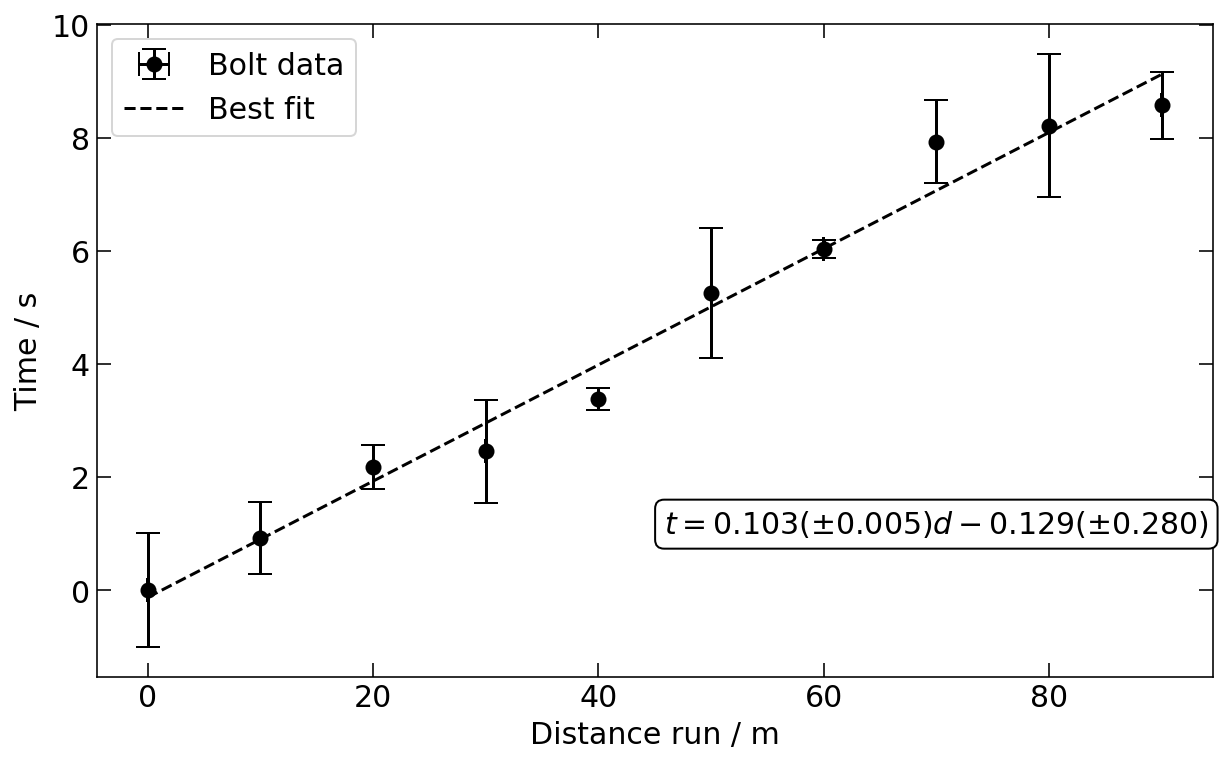

In [12]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(data.distance,           # x coordinates
             data.time,              # y coordinates
             xerr=data.err_distance, # x errors
             yerr=data.err_time,     # y errors
             marker='o',             # marker used is a cicle 'o'. Could be crosses 'x', or squares 's', or 'none'
             markersize = 7,        # marker size
             color='black',          # overall colour I think
             ecolor='black',         # edge colour for you marker
             markerfacecolor='black',
             linestyle='none',       # no line joining markers, could be a line '-', or a dashed line '--'
             capsize=6,  
             label = "Bolt data"# width of the end bit of the error bars, not too small nor too big please.
             )
#ax.set_xlabel('Distance run / m')  
ax.set_xlabel('Distance run / m')# You can use Latex here is you wish, e.g., 'Distance run / 10$^{-3}$ km'
ax.set_ylabel('Time / s')

ax.tick_params(direction='in',      # I like 'in', could be 'out' or both 'inout'
                length=7,            # A reasonable length
                bottom='on',         # I want ticks on the bottom axes
                left='on',
                top='on',
                right='on',  
               )
ax.plot(data.distance, data.distance*slope+intercept, 
         linestyle='--',
         color='black',
         label='Best fit')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1],loc=0, numpoints=1)
annotation ='$t = {0:.3f} ( \pm {1:.3f})d {2:+.3f} (\pm {3:.3f})$'.format(slope, err_slope, intercept, err_intercept)
ax.annotate(annotation, xy=(70, 1), xycoords='data', ha='center', bbox=dict(boxstyle="round", fc="w"))
plt.show()

In [13]:
fig.savefig('Basic.png', dpi=300) # save the graph to a file.

Now we have the data in the computer we can produce a nice graph of it. The code below has various comments to guide as to what's what. You can play with all the various settings to change the graph. Just keeping clicking the "run" button to see what your new version looks like. It you want more advanced stuff then you'll need to do more reading. See the help for matplotlib and have a look at the tutorials: http://blogs.bath.ac.uk/python/data-analysis-with-jupyter-notebooks/

<div class="w3-panel w3-leftbar w3-border-green w3-pale-green w3-padding-small">
    <h3 id="-Key-points%3A%0A"><i class="fa fa-key"></i> Key points:
</h3>
    <ul>
<li>You can use Jupyter notebooks just like you would use a lab book</li>
<li>Read in data with <code>pandas</code></li>
<li>Make your plots with <code>matplotlib</code></li>
<li>Errorbars!</li>
</ul>
</div>

<div class="w3-bar w3-blue-grey">
<a href="./99_episode_template.ipynb" class="w3-bar-item w3-button"><h2><i class="fa fa-angle-double-left"></i> Previous</h2></a>
<a href="./00_schedule.ipynb" class="w3-bar-item w3-button w3-center" style="width:60%"><h2>Schedule</h2></a>
<a href="./00_schedule.ipynb" class="w3-bar-item w3-button w3-right"><h2>Next <i class="fa fa-angle-double-right"></i></h2></a>
</div>